# A. Product Recommendation System
- Recommending similar product based on text features.
- The use of recommendation systems is now very common in e-commerce companies like Amazon, Flipkart, Myntra, etc.  

# B. Business Objective
- Many people use e-commerce platforms to buy products. When a product is selected, people expect to see similar products.
- A model which can recommend people similar products is our Business Objective.

# C. Constaints

1. Low Latency - In real time within in few nano seconds the model should be able to recommend similar product to people.

2. Speed - We need speedy model not 100% accurate model. So accuracy is not important. 

3. Same product recommendation error - People doesn't like to see same product again and again.

4. Interpretablity is important.

# D. Data
- Data contains ladies tops fashion of amazon , initially data has 183k rows and 19 features.
- Out of 19 features we will use only 7 importnt features.
- By cleaning data we brought down the number of data points from 183K to 25K.

# E. Approch
- Titles fairly describe what the product is.
- We will use the title feature to recommend a product because they are short and informative.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import nltk
from functools import reduce
from nltk.corpus import stopwords
from collections import Counter
from io import BytesIO
from PIL import Image
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
# we have a json file which consists of all information about the products.
data = pd.read_json('tops_fashion.json')

In [3]:
print ('Number of data points :', data.shape[0], \
       '\nNumber of features/variables:', data.shape[1])

Number of data points : 183138 
Number of features/variables: 19


# F. Data Cleaning

In [4]:
data.head() 

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN


In [5]:
# Let's see features we have in dataset.
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

Of these 19 features, we will use only 7 features in this project.
- 1. asin  (Amazon standard identification number)
- 2. brand (brand name of the product)
- 3. medium_image_url  (url of the product image)
- 4. product_type_name (type of the product)
- 5. color (color information of the product) 
- 6. title (title of the product)
- 7. formatted_price (price of the product)

In [6]:
data = data[['asin', 'brand', 'medium_image_url', 'product_type_name', 'color', 'title', 'formatted_price']]

In [7]:
# data.to_csv('tops_fashion2.csv', index=False)

In [8]:
print ('Number of data points :', data.shape[0], \
       '\nNumber of features:', data.shape[1])
data.head()

Number of data points : 183138 
Number of features: 7


,asin,brand,medium_image_url,product_type_name,color,title,formatted_price
0,B016I2TS4W,FNC7C,https://images-na.ssl-images-amazon.com/images...,SHIRT,None,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,https://images-na.ssl-images-amazon.com/images...,SHIRT,None,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,https://images-na.ssl-images-amazon.com/images...,SHIRT,None,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,https://images-na.ssl-images-amazon.com/images...,SHIRT,None,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,https://images-na.ssl-images-amazon.com/images...,SHIRT,Onyx Black/ Stone,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


- Let's understand each feature in detail
- We will drop data points having missing features and/or duplicte features.

In [9]:
data.describe()

,asin,brand,medium_image_url,product_type_name,color,title,formatted_price
count,183138,182987,183138,183138,64956,183138,28395
unique,183138,10577,170782,72,7380,175985,3135
top,B016I2TS4W,Zago,https://images-na.ssl-images-amazon.com/images...,SHIRT,Black,Nakoda Cotton Self Print Straight Kurti For Women,$19.99
freq,1,223,23,167794,13207,77,945


# (1) "asin" Feature

In [10]:
print("Products",data.shape[0])
print(data['asin'].describe())
if data['asin'].isnull().sum() == 0:
    print("- All products have 'asin' information")
else:
    print("- {0} products does not have 'asin' information.".format(data['asin'].isnull().sum()))
if data['asin'].duplicated().sum() == 0:
    print("- Each products have unique 'asin' information")
else:
    print("- {0} products have same 'asin' information.".format(data['asin'].duplicated().sum()))

Products 183138
count         183138
unique        183138
top       B016I2TS4W
freq               1
Name: asin, dtype: object
- All products have 'asin' information
- Each products have unique 'asin' information


# (2) "brand" Feature 

In [11]:
print("Products ",data.shape[0])
print(data['brand'].describe())
if data['brand'].isnull().sum() == 0:
    print("- All products have 'brand' information")
else:
    print("- {0} products does not have 'brand' information.".format(data['brand'].isnull().sum()))
if data['brand'].duplicated().sum() == 0:
    print("- Each products have unique 'brand' information")
else:
    print("- {0} products have same 'brand' information.".format(data['brand'].duplicated().sum()))

Products  183138
count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object
- 151 products does not have 'brand' information.
- 172560 products have same 'brand' information.


- 182987 of 183138 products have 'brand' information. That's apporx 99.91%
- We have 10577 unique 'brand'.
- 2.1% (223/10577) of the brands are 'Zago'.
- Same brands have different products, so will only drop missing 'brand' value information.
- Let's drop 151 data points / rows that does not have 'brand' information.

In [12]:
data =data.loc[~data['brand'].isnull()]

# Reset dataframe index.
data = data.reset_index(drop=True)
print("- Number of data points after eliminating brand = NULL :", data.shape[0])

- Number of data points after eliminating brand = NULL : 182987


In [13]:
# Let's print top 10 'brand' and their frequency
brand_count = Counter(list(data['brand']))
for i in range(10):
    print("{0} - {1}".format(brand_count.most_common()[i][0],brand_count.most_common()[i][1])) 

Zago - 223
XQS - 222
Yayun - 215
YUNY - 198
XiaoTianXin-women clothes - 193
Generic - 192
Boohoo - 190
Alion - 188
Abetteric - 187
TheMogan - 187


# (3) "medium_image_url" Feature 

In [14]:
print("Products",data.shape[0])
print(data['medium_image_url'].describe())
if data['medium_image_url'].isnull().sum() == 0:
    print("- All products have 'medium_image_url' information")
else:
    print("- {0} products does not have 'medium_image_url' information.".format(data['medium_image_url'].isnull().sum()))
if data['medium_image_url'].duplicated().sum() == 0:
    print("- Each products have unique 'medium_image_url' information")
else:
    print("- {0} products have same 'medium_image_url' information.".format(data['medium_image_url'].duplicated().sum()))

Products 182987
count                                                182987
unique                                               170667
top       https://images-na.ssl-images-amazon.com/images...
freq                                                     23
Name: medium_image_url, dtype: object
- All products have 'medium_image_url' information
- 12320 products have same 'medium_image_url' information.


- All of the products have image URL.
- But we have only 1,70,667 unique 'medium_image_url'.
- Some products have same image URL so lets check 'title' information for that URLs.

In [15]:
for duplicate in range(len(data['medium_image_url'].duplicated())):
    if data['medium_image_url'].duplicated()[duplicate] == True:
        duplicate_df = data[data['medium_image_url'] == data['medium_image_url'][duplicate]]
        duplicate_df = duplicate_df.reset_index(drop=True)
        break
for i in range(duplicate_df.shape[0]):
    print(duplicate_df['medium_image_url'][i])
    print(duplicate_df['title'][i])
    print()

https://images-na.ssl-images-amazon.com/images/I/41Cn7jZ3O9L._SL160_.jpg
Supernatural Chibis Sam Dean And Castiel Short Sleeve T Shirts For Lady Purple S

https://images-na.ssl-images-amazon.com/images/I/41Cn7jZ3O9L._SL160_.jpg
Supernatural Chibis Sam Dean And Castiel O Neck T-shirts For Female Purple L

https://images-na.ssl-images-amazon.com/images/I/41Cn7jZ3O9L._SL160_.jpg
Supernatural Chibis Sam Dean And Castiel 100% Cotton T Shirts For Women Purple XXL



- From above titles and URLs it is clear that,some products may have same image URL but their title is different.
- So will 'not' drop those data points having same image 'URL'.

# (4) "product_type_name" Feature 

In [16]:
print("Products ",data.shape[0])
print(data['product_type_name'].describe())
if data['product_type_name'].isnull().sum() == 0:
    print("- All products have 'product_type_name' information")
else:
    print("- {0} products does not have 'product_type_name' information.".format(data['product_type_name'].isnull().sum()))
if data['product_type_name'].duplicated().sum() == 0:
    print("- Each products have unique 'product_type_name' information")
else:
    print("- {0} products have same 'product_type_name' information.".format(data['product_type_name'].duplicated().sum()))

Products  182987
count     182987
unique        72
top        SHIRT
freq      167741
Name: product_type_name, dtype: object
- All products have 'product_type_name' information
- 182915 products have same 'product_type_name' information.


- All products have 'product_type_name'.
- We have total 72 unique type of 'product_type_name'.
- 91.62% (167794/183138) of the products are shirts.
- Let's check 'title' information for same 'product_type_name'.

In [17]:
for duplicate in range(len(data['product_type_name'].duplicated())):
    if data['product_type_name'].duplicated()[duplicate] == True:
        duplicate_df = data[data['product_type_name'] == data['product_type_name'][duplicate]]
        duplicate_df = duplicate_df.reset_index(drop=True)
        break
for i in range(duplicate_df.shape[0]):
    print(duplicate_df['product_type_name'][i])
    print(duplicate_df['title'][i])
    print()
    if i >= 5:
        break

SHIRT
Minions Como Superheroes Ironman Long Sleeve Round Neck T-Shirt For Women

SHIRT
FIG Clothing Womens Izo Tunic

SHIRT
FIG Clothing Womens Won Top

SHIRT
Focal18 Sailor Collar Bubble Sleeve Blouse Shirt Women Mori Girl Casual Top Harajuku

SHIRT
Featherlite Ladies' Long Sleeve Stain Resistant Tapered Twill Shirt, 2XL, Onyx Black/ Stone

SHIRT
[Fits Cloth] Grape Solid Modern Long Sleeve Plain T Shirt



- It is clear that, for same 'product_type_name' we have different 'title' information.

In [18]:
# Let's print top 10 'product_type_name' and their frequency
product_list=Counter(data['product_type_name'])
for i in range(10):
    print("{0} - {1}".format(product_list.most_common()[i][0],product_list.most_common()[i][1])) 

SHIRT - 167741
APPAREL - 3548
BOOKS_1973_AND_LATER - 3336
DRESS - 1584
SPORTING_GOODS - 1272
SWEATER - 837
OUTERWEAR - 796
OUTDOOR_RECREATION_PRODUCT - 729
ACCESSORY - 636
UNDERWEAR - 425


# (5) "color" Feature 

In [19]:
print("Products ",data.shape[0])
print(data['color'].describe())
if data['color'].isnull().sum() == 0:
    print("- All products have 'color' information")
else:
    print("- {0} products does not have 'color' information.".format(data['color'].isnull().sum()))
if data['color'].duplicated().sum() == 0:
    print("- Each products have unique 'color' information")
else:
    print("- {0} products have same 'color' information.".format(data['color'].duplicated().sum()))

Products  182987
count     64843
unique     7377
top       Black
freq      13181
Name: color, dtype: object
- 118144 products does not have 'color' information.
- 175609 products have same 'color' information.


- 64843 of 182987 products have color information. That's approx 35.4%.
- We have 7377 unique 'colors'
- 11.37% of products are black in color.
- Let's drop records that does not have color information

In [20]:
data =data.loc[~data['color'].isnull()]

# Reset dataframe index.
data = data.reset_index(drop=True)
print('Number of data points after eliminating color = NULL :', data.shape[0])

Number of data points after eliminating color = NULL : 64843


- Let's check 'title' information for same 'color' information.

In [21]:
for duplicate in range(len(data['color'].duplicated())):
    if data['color'].duplicated()[duplicate] == True:
        duplicate_df = data[data['color'] == data['color'][duplicate]]
        duplicate_df = duplicate_df.reset_index(drop=True)
        break
for i in range(duplicate_df.shape[0]):
    print(duplicate_df['color'][i])
    print(duplicate_df['title'][i])
    print()
    if i >= 5:
        break

Black
Standing on His Promises Rhinestones T-Shirt Ripped Cut Out Red Long

Black
Ladies Cotton Tank 2x1 Ribbed Tank Top

Black
Sexy Open Shoulder X Long Soft Shark Hemline Womans Plus Blouse Top 1x2x3x

Black
Women Roses Patch & Rhinestones T-Shirt Ripped Cut Out Short 01

Black
[Fits Cloth] Black Days Like Bless Plain T Shirt

Black
Fifth Degree Womens Gold Foil Graphic Tees Junior Top Short Sleeve Printed T Shirt - L



- It is clear that, same color information have different titles.

In [22]:
# Let's print top 10 'color' and their frequency
color_count = Counter(list(data['color']))
for i in range(10):
    print("{0} - {1}".format(color_count.most_common()[i][0],color_count.most_common()[i][1])) 

Black - 13181
White - 8599
Blue - 3558
Red - 2283
Pink - 1837
Grey - 1496
* - 1388
Green - 1257
Multi - 1203
Gray - 1189


# (6) "title" Feature 

In [23]:
print("Products",data.shape[0])
print(data['title'].describe())
if data['title'].isnull().sum() == 0:
    print("- All products have 'title' information")
else:
    print("- {0} products does not have 'title' information.".format(data['title'].isnull().sum()))
if data['title'].duplicated().sum() == 0:
    print("- Each products have unique 'title' information")
else:
    print("- {0} products have same 'title' information.".format(data['title'].duplicated().sum()))

Products 64843
count                                                 64843
unique                                                61568
top       FINEJO Casual Women Long Sleeve Lace Irregular...
freq                                                     47
Name: title, dtype: object
- All products have 'title' information
- 3275 products have same 'title' information.


- All of the 64843 products have title. 
- We have 61568 unique 'titles'.
- Let's check duplicate titles.

In [24]:
for duplicate in range(len(data['title'].duplicated())):
    if data['title'].duplicated()[duplicate] == True:
        duplicate_df = data[data['title'] == data['title'][duplicate]]
        duplicate_df = duplicate_df.reset_index(drop=True)
        break
for i in range(duplicate_df.shape[0]):
    print("asin - {0} , Brand - {1} , Color - {2}".format(duplicate_df['asin'][i], duplicate_df['brand'][i], duplicate_df['color'][i]))
    print(duplicate_df['medium_image_url'][i])
    print(duplicate_df['title'][i])
    print()
    if i >= 5:
        break

asin - B003BTPVGA , Brand - FeatherLite , Color - Pacific Blue
https://images-na.ssl-images-amazon.com/images/I/41ygbhq127L._SL160_.jpg
FeatherLite Ladies Long Sleeve Stain Resistant Tapered Twill Shirt, Pacific B.

asin - B003BTPVHE , Brand - FeatherLite , Color - Pacific Blue
https://images-na.ssl-images-amazon.com/images/I/41ygbhq127L._SL160_.jpg
FeatherLite Ladies Long Sleeve Stain Resistant Tapered Twill Shirt, Pacific B.

asin - B003BTPVEM , Brand - FeatherLite , Color - Pacific Blue
https://images-na.ssl-images-amazon.com/images/I/41ygbhq127L._SL160_.jpg
FeatherLite Ladies Long Sleeve Stain Resistant Tapered Twill Shirt, Pacific B.

asin - B003BTOHHO , Brand - FeatherLite , Color - Pacific Blue
https://images-na.ssl-images-amazon.com/images/I/41ygbhq127L._SL160_.jpg
FeatherLite Ladies Long Sleeve Stain Resistant Tapered Twill Shirt, Pacific B.

asin - B003BTOHG0 , Brand - FeatherLite , Color - Pacific Blue
https://images-na.ssl-images-amazon.com/images/I/41ygbhq127L._SL160_.jpg


- It is clear that except 'asin' every feature is same for 'title' feature.
- So will drop all these duplicate titles.

In [25]:
# Let's drop duplicate title
data['title'] = data['title'].drop_duplicates()

# Now we will drop records that have 'Null/None" title.
data = data.loc[~data['title'].isnull()]

# Reset dataframe index.
data = data.reset_index(drop=True)
print('Number of data points after eliminating duplicte titles :', data.shape[0])

Number of data points after eliminating duplicte titles : 61568


# (7) "formatted_price" Feature 

In [26]:
print("Products ",data.shape[0])
print(data['formatted_price'].describe())
if data['formatted_price'].isnull().sum() == 0:
    print("- All products have 'formatted_price' information")
else:
    print("- {0} products does not have 'formatted_price' information.".format(data['formatted_price'].isnull().sum()))
if data['formatted_price'].duplicated().sum() == 0:
    print("- Each products have unique 'formatted_price' information")
else:
    print("- {0} products have same 'formatted_price' information.".format(data['formatted_price'].duplicated().sum()))

Products  61568
count      25955
unique      3095
top       $19.99
freq         899
Name: formatted_price, dtype: object
- 35613 products does not have 'formatted_price' information.
- 58472 products have same 'formatted_price' information.


- Only 25,955 (42.15%) products have price information.
- 899 products have same price. That's "$19.99"
- Some products have same price but different 'title','brand' and other informations.
- So we will drop only those products which does not have price information.

In [27]:
data = data.loc[~data['formatted_price'].isnull()]

# Reset dataframe index.
data = data.reset_index(drop=True)
print('Number of data points after eliminating formatted_price = NULL :', data.shape[0])

Number of data points after eliminating formatted_price = NULL : 25955


In [28]:
# Lets print top 10 'formatted_price' and their frequency
price_count = Counter(list(data['formatted_price']))
for i in range(10):
    print("{0} - {1}".format(price_count.most_common()[i][0],price_count.most_common()[i][1])) 

$19.99 - 899
$9.99 - 664
$9.50 - 541
$14.99 - 412
$24.99 - 400
$7.50 - 395
$29.99 - 355
$16.99 - 288
$12.99 - 273
$8.99 - 263


- We brought down the number of data points from 183K to 25K.

In [29]:
data.to_csv('tops_fashion.csv',index=False)

# F. Text Data Preprocessing

In [30]:
# Title column for us is very important we will remove all the title with less than 4 words
data=data[data['title'].apply(lambda x: len(x.split())>=4)]

# Reset index of data farme.
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25863 entries, 0 to 25862
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   asin               25863 non-null  object
 1   brand              25863 non-null  object
 2   medium_image_url   25863 non-null  object
 3   product_type_name  25863 non-null  object
 4   color              25863 non-null  object
 5   title              25863 non-null  object
 6   formatted_price    25863 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [31]:
# now let's sort the data points based on title (in alphabetical descending order)
data.sort_values("title", inplace=True, ascending=False)
data= data.reset_index(drop=True)
data.head()

,asin,brand,medium_image_url,product_type_name,color,title,formatted_price
0,B06Y1KZ2WB,Éclair,https://images-na.ssl-images-amazon.com/images...,SHIRT,Black/Pink,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
1,B010RV33VE,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,Pink,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
2,B01DDSDLNS,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,White,xiaoming Women's White Long Sleeve Single Brea...,$21.58
3,B00X5LYO9Y,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,Red Anchors,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
4,B00WPJG35K,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,White,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


- We can observe that brand name also present in title text.
- We are removing brand name from title text.

In [32]:
brand_list = []
for i in (data['brand'].unique()):
    i = i.lower()
    brand_list.append(i)
# print(brand_list)
len((brand_list))

3600

In [33]:
nltk.download("stopwords")
nltk_stopwords = list(stopwords.words('english'))
print(nltk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import string
alphabets = list(string.ascii_lowercase)
print(alphabets)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [35]:
stop_words = nltk_stopwords + alphabets
stop_words = set(stop_words)
len(stop_words)

197

In [36]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        # Remove Brand name
        no_brand_text=[]
        for j in total_text.split():
            j = j.lower()
            if not j in brand_list:
                no_brand_text.append(j)

        # Remove special characters:
        word=[]
        for words in no_brand_text: 
            word.append(re.sub( '[^A-Za-z0-9]', ' ', words))

        # seperate word having ' ' in word list.
        seperate_word = []
        for w in word:
            if ' ' in w:
                for i in w.split():
                    x = seperate_word.append(i)
            else:
                x = seperate_word.append(w)

        # get unique words from seperte_word list 
        unique_words = reduce(lambda re, x: re+[x] if x not in re else re, seperate_word, [])

        # remove stop words and brand name from unique_words list:
        string = ""
        for word in unique_words:
            if not word in stop_words :
                string += word + " "
        # add processed data to new column
        data['processed_{0}'.format(column)][index] = string


In [37]:
start_time = time.perf_counter()

# make a new column as 'processed_column-name' and assign 'Nan' value.
data['processed_title'] = np.nan

# Processing title text to remove special characters and stop words and save it to new column.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

# Let's print time taken to complete this code snippet
print(time.perf_counter() - start_time, "seconds")

# It may takes more seconds

36.81906570000001 seconds


In [38]:
data.head()

,asin,brand,medium_image_url,product_type_name,color,title,formatted_price,processed_title
0,B06Y1KZ2WB,Éclair,https://images-na.ssl-images-amazon.com/images...,SHIRT,Black/Pink,Éclair Women's Printed Thin Strap Blouse Black...,$24.99,women printed thin strap blouse junior
1,B010RV33VE,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,Pink,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19,womens sleeveless loose long shirts top blouse
2,B01DDSDLNS,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,White,xiaoming Women's White Long Sleeve Single Brea...,$21.58,women white long sleeve single breast loose co...
3,B00X5LYO9Y,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,Red Anchors,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91,stripes tank patch bear sleeve anchor short em...
4,B00WPJG35K,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,White,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32,sleeve sheer loose tassel kimono woman chiffon...


In [39]:
# let's check processed titles with original title
for i in range(5):
    print(i,data['title'][i])
    print("-",data['processed_title'][i])

0 Éclair Women's Printed Thin Strap Blouse Black - Junior XL
- women printed thin strap blouse junior 
1 xiaoming Womens Sleeveless Loose Long T-shirts Top Blouse Shirts
- womens sleeveless loose long shirts top blouse 
2 xiaoming Women's White Long Sleeve Single Breast Loose Cotton Linen Blouse Shirt
- women white long sleeve single breast loose cotton linen blouse shirt 
3 xiaoming Stripes Tank Patch/Bear Sleeve Anchor Short Embellishment Top Red Ancho
- stripes tank patch bear sleeve anchor short embellishment top red ancho 
4 xiaoming Sleeve Sheer Loose Tassel Kimono Woman Chiffon Cardigan Blouse White On
- sleeve sheer loose tassel kimono woman chiffon cardigan blouse white 


In [40]:
# Let's see similar title in first 40 products.
for i in range(20):
    print(i,data['title'][i])

0 Éclair Women's Printed Thin Strap Blouse Black - Junior XL
1 xiaoming Womens Sleeveless Loose Long T-shirts Top Blouse Shirts
2 xiaoming Women's White Long Sleeve Single Breast Loose Cotton Linen Blouse Shirt
3 xiaoming Stripes Tank Patch/Bear Sleeve Anchor Short Embellishment Top Red Ancho
4 xiaoming Sleeve Sheer Loose Tassel Kimono Woman Chiffon Cardigan Blouse White On
5 xiaoming Sleeve Plaid Checked Casual Tops Shirt Women Loose T Long Blouse Red+Gr
6 xiaoming Shirt Black Blouse Casual Oversized Women's T Loose Large Tops Figure C
7 xiaoming Casual Women Long Loose Sleeve Shirt Neck Draped Blouse Yellow Large /
8 xiaoming Casual Sleeve Womens Shirt Lace Chiffon Short Top Yellow Medium / US4-U
9 xiaoming Blazer Womens Style Cape Hippie Loose Kimono Jacket red+whtie L US6
10 xiaoming And Flare Women Long Sleeve Fit Tops Peplum Top Neck Tops Top Blue Medi
11 xhilaration Womens' Long Sleeve Sleep Shirt, Purple/Raccoon, Medium
12 xhilaration Womens' Long Sleeve Sleep Shirt, Bubble Gum

In [41]:
for i in range(20,40):
    print(i,data['title'][i])

20 virblatt batwing top as hippie clothes for women - Namasté
21 vihaan impex kurtis for women indian kurti for women kurtas for women indian kurtis
22 vanberfia Women's Sexy O Neck Casual Blouse Tops Lace Long Sleeve Blouse Tops (M, 8720)
23 underfell skele bros Women's DIY Customize T-shirt,Black (X-Large,Black,X-large,black)
24 tokidoki The Queen of Diamonds Women's Shirt X-Large
25 tokidoki The Queen of Diamonds Women's Shirt Small
26 tokidoki The Queen of Diamonds Women's Shirt Large
27 tokidoki Skateboard Latte Women's Shirt Medium
28 tokidoki Ninja Dog Womens Shirt Small
29 tokidoki Harmony Women's Shirt Small
30 tokidoki Chica Polka Dot Women's Tank Top Medium
31 thistle purple Lao Laos Sleeveless Blouse Classic Neckline Tops Size 38 M SL38E
32 thistle purple Lao Laos Sleeveless Blouse Classic Neckline Tops Size 36 M SL36I
33 the godfather with toys black for 2X-Large White woman T shirt
34 tank top with lace and double straps
35 summer Women's O-Neck white Backless BKY13-014
3

- For dataframe arranged in descending order we found that product index numbers (12,13), (24,25,26), (31,32) have similar name but that products differ in size only.
- Let's see there image and title name:

In [42]:
# function to display image of product using 'medium_image_url' of product.
def display_img(url):
    # we will use  'medium_imge_url' of the product.
    fig = plt.figure(figsize=(25,3))
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.show()

12 xhilaration Womens' Long Sleeve Sleep Shirt, Bubble Gum Pink, X-Large
https://images-na.ssl-images-amazon.com/images/I/41f-Fvet3tL._SL160_.jpg


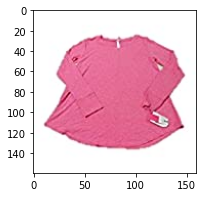

13 xhilaration Womens' Long Sleeve Sleep Shirt, Bubble Gum Pink, Small
https://images-na.ssl-images-amazon.com/images/I/41f-Fvet3tL._SL160_.jpg


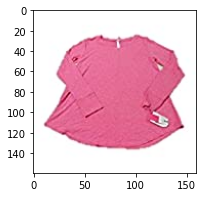

24 tokidoki The Queen of Diamonds Women's Shirt X-Large
https://images-na.ssl-images-amazon.com/images/I/51wUlfCdaEL._SL160_.jpg


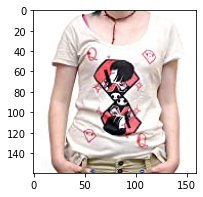

25 tokidoki The Queen of Diamonds Women's Shirt Small
https://images-na.ssl-images-amazon.com/images/I/51UjkpxA4HL._SL160_.jpg


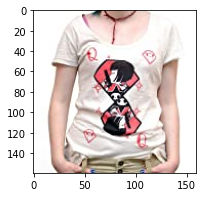

26 tokidoki The Queen of Diamonds Women's Shirt Large
https://images-na.ssl-images-amazon.com/images/I/51UjkpxA4HL._SL160_.jpg


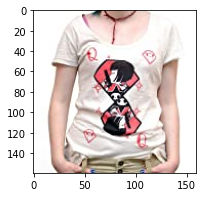

31 thistle purple Lao Laos Sleeveless Blouse Classic Neckline Tops Size 38 M SL38E
https://images-na.ssl-images-amazon.com/images/I/51X1vA7TJLL._SL160_.jpg


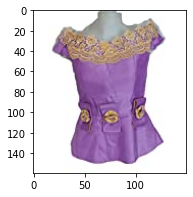

32 thistle purple Lao Laos Sleeveless Blouse Classic Neckline Tops Size 36 M SL36I
https://images-na.ssl-images-amazon.com/images/I/51mtjy%2BDJJL._SL160_.jpg


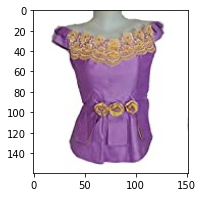

In [43]:
# Let's print title and image for record numbers 12,13,24,25,26,31,32
for i in [12,13,24,25,26,31,32]:
    print(i,data['title'][i])
    print(data['medium_image_url'][i])
    display_img(data['medium_image_url'][i])

- It is clear that, product title is nearly same but size is different.
- So, in such cases, we will consider only the first product and eliminate the rest of the products of various sizes.
- We can eliminate such similar products in two ways. Either by removing duplicate duplicate URLs or by processing the title.
- For first 2 products URL is same but for last 2 products URl is different.
- So to remove duplicate product we have to use another way i.e. processing similar titles.
- Hence we have to use another way i.e. processing on similar title to remove duplicte product.
- Otherwise we can first remove similar URLs and then process the same title to remove similar products of different sizes.
- Perhaps this method will take less time and will not put too much load on the CPU.

In [44]:
print('Number of data points before eliminating duplicte url :', data.shape[0])

# Let's drop duplicate title
data['medium_image_url'] = data['medium_image_url'].drop_duplicates()

# Now we will drop records that have 'Null/None" title.
data = data.loc[~data['medium_image_url'].isnull()]

# Reset dataframe index.
data = data.reset_index(drop=True)
print('Number of data points after eliminating duplicte url :', data.shape[0])

Number of data points before eliminating duplicte url : 25863
Number of data points after eliminating duplicte url : 19072


- Now we will process title using following code snippet

In [45]:
import itertools

indices = []
for i,row in data.iterrows():
    indices.append(i)

different_titles = []
i = 0
j = 0
data_points = data.shape[0]
while i < data_points and j < data_points:
    previous_i = i
    # store the list of words of ith string in a.
    a = data['processed_title'].loc[indices[i]].split()

    # search for the similar products sequentially in dataframe
    j = i+1
    while j < data_points:

        # store the list of words of jth string in b.
        b = data['processed_title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in both strings differ by more than 2, we are considering it as those two apperals are different.
        # if the number of words in both strings differ by less than 2, we are considering it as those two apperals are same, hence we are ignoring them.
        if (length - count) > 2:  
            # if both strings differ by more than 2 words we include the 1st string index
            different_titles.append(data['asin'].loc[indices[i]])        

            # if the comaprision is between last and second last index strings and they differ by more than 2 words we include both
            if j == data_points-1:
                different_titles.append(data['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds to 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [46]:
data = data.loc[data['asin'].isin(different_titles)]
data = data.reset_index(drop=True)
print('Number of data points after processing titles :', data.shape[0])

Number of data points after processing titles : 16119


In [47]:
for i in range(26):
    print(i,data['title'][i])

0 Éclair Women's Printed Thin Strap Blouse Black - Junior XL
1 xiaoming Womens Sleeveless Loose Long T-shirts Top Blouse Shirts
2 xiaoming Women's White Long Sleeve Single Breast Loose Cotton Linen Blouse Shirt
3 xiaoming Stripes Tank Patch/Bear Sleeve Anchor Short Embellishment Top Red Ancho
4 xiaoming Sleeve Sheer Loose Tassel Kimono Woman Chiffon Cardigan Blouse White On
5 xiaoming Sleeve Plaid Checked Casual Tops Shirt Women Loose T Long Blouse Red+Gr
6 xiaoming Shirt Black Blouse Casual Oversized Women's T Loose Large Tops Figure C
7 xiaoming Casual Women Long Loose Sleeve Shirt Neck Draped Blouse Yellow Large /
8 xiaoming Casual Sleeve Womens Shirt Lace Chiffon Short Top Yellow Medium / US4-U
9 xiaoming Blazer Womens Style Cape Hippie Loose Kimono Jacket red+whtie L US6
10 xiaoming And Flare Women Long Sleeve Fit Tops Peplum Top Neck Tops Top Blue Medi
11 xhilaration Womens' Long Sleeve Sleep Shirt, Purple/Raccoon, Medium
12 xhilaration Womens' Long Sleeve Sleep Shirt, Bubble Gum

- We removed similar product having different sizes.
- Let's save dataset in pickle format to use it during model building.

In [48]:
data.to_pickle('16k_processed_data')

In [49]:
data.head()

,asin,brand,medium_image_url,product_type_name,color,title,formatted_price,processed_title
0,B06Y1KZ2WB,Éclair,https://images-na.ssl-images-amazon.com/images...,SHIRT,Black/Pink,Éclair Women's Printed Thin Strap Blouse Black...,$24.99,women printed thin strap blouse junior
1,B010RV33VE,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,Pink,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19,womens sleeveless loose long shirts top blouse
2,B01DDSDLNS,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,White,xiaoming Women's White Long Sleeve Single Brea...,$21.58,women white long sleeve single breast loose co...
3,B00X5LYO9Y,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,Red Anchors,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91,stripes tank patch bear sleeve anchor short em...
4,B00WPJG35K,xiaoming,https://images-na.ssl-images-amazon.com/images...,SHIRT,White,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32,sleeve sheer loose tassel kimono woman chiffon...
